<a href="https://colab.research.google.com/github/markstowell15/StanceDetectionML-Brockport/blob/main/YTCommentSentimentAnalysisSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import re
import nltk
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from textblob import TextBlob

from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
filename = "/content/currentdata.csv"
df = pd.read_csv(filename, usecols=["commentTextDisplay", "Standing"], encoding="utf-8")
print(df)

                                    commentTextDisplay  Standing
0    But look at the other side with the adverse re...         0
1    I feel like if you don’t want to be vaccinated...         0
2                                 His body his choice.         0
3    I have an idea 💡  .. how about you leave peopl...         0
4    I respect your freedom of choice. My family me...         0
..                                                 ...       ...
942  The recovery rate is 99.8 % . Why are stupid l...         2
943  DON&#39;T GET VACCINATED !!!   Don&#39;t let t...         2
944  I&#39;d explain in detail the deaths and side ...         2
945  I am so happy to read the comments because I d...         2
946  I now personally know 3 people that have teste...         2

[947 rows x 2 columns]


In [ ]:
#Clean the text
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
other_stop_words = ['<br>', 'br', 'quot','â€','***','fu', 'ck', 'i']
stop_words.extend(other_stop_words)
stop_words.remove('not')
print(stop_words)
def unicodetoascii(text):

    TEXT = (text.replace('\\n\\n', " ").
    	    replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x95', '-').
            replace('\\xe2\\x80\\x96', '||').
            replace('\\xe2\\x80\\x97', '_').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x99', "'").
            replace('\\xe2\\x80\\x9a', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa4', '.').
            replace('\\xe2\\x80\\xa5', '..').
            replace('\\xe2\\x80\\xa6', '...').
            replace('\\xe2\\x80\\xa7', '.').
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\x87', "??").
            replace('\\xe2\\x81\\x88', "?!").
            replace('\\xe2\\x81\\x89', "!?").
            replace('\\xe2\\x81\\x93', "~").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")")

                 )
    return TEXT

def tokenize(sentence):
    new_sentence = nltk.word_tokenize(sentence)
    return new_sentence

def remove_stopwords(sentence):
    new_sentence = [word for word in sentence if not word in stop_words]
    return new_sentence

def remove_non_alphabets(sentence):
    new_sentence = [word for word in sentence if re.match('[a-zA-Z]+', word)]
    return new_sentence

def lemmatize(sentence):
    new_sentence = [wordnet_lemmatizer.lemmatize(word) for word in sentence]
    return new_sentence

def cleanTxt(text):
  text = text.lower()
  text = unicodetoascii(text)
  text = tokenize(text)
  text = remove_stopwords(text)
  text = remove_non_alphabets(text)
  text = lemmatize(text)
  text = TreebankWordDetokenizer().detokenize(text)

  return text
df['commentTextDisplay']=df['commentTextDisplay'].apply(cleanTxt)
df.to_csv('updatedComments.csv', encoding='utf-8')
print(df)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['commentTextDisplay'].apply(getSubjectivity)
df['Polarity'] = df['commentTextDisplay'].apply(getPolarity)

df

,commentTextDisplay,Standing,Subjectivity,Polarity
0,look side adverse reaction vaccine choose poison,0,0.000000,0.000000
1,feel like want vaccinated choice run hospital ...,0,0.000000,0.000000
2,body choice,0,0.000000,0.000000
3,idea leave people alone let make decision best...,0,0.300000,1.000000
4,respect freedom choice family member infected ...,0,0.384127,0.114286
...,...,...,...,...
942,recovery rate stupid libs pushing plan demic,2,1.000000,-0.800000
943,get vaccinated let college nerd liberal tell a...,2,0.319048,0.195238
944,explain detail death side effect uneffective r...,2,0.000000,0.000000
945,happy read comment see one favour poison keep ...,2,0.800000,0.541667


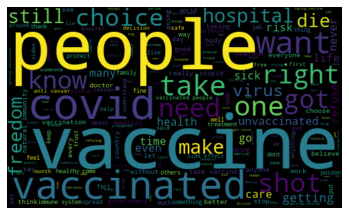

In [ ]:
# Plot Word Cloud
allWords = ' '.join( [comments for comments in df['commentTextDisplay']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,commentTextDisplay,Standing,Subjectivity,Polarity,Analysis
0,look side adverse reaction vaccine choose poison,0,0.000000,0.000000,Neutral
1,feel like want vaccinated choice run hospital ...,0,0.000000,0.000000,Neutral
2,body choice,0,0.000000,0.000000,Neutral
3,idea leave people alone let make decision best...,0,0.300000,1.000000,Positive
4,respect freedom choice family member infected ...,0,0.384127,0.114286,Positive
...,...,...,...,...,...
942,recovery rate stupid libs pushing plan demic,2,1.000000,-0.800000,Negative
943,get vaccinated let college nerd liberal tell a...,2,0.319048,0.195238,Positive
944,explain detail death side effect uneffective r...,2,0.000000,0.000000,Neutral
945,happy read comment see one favour poison keep ...,2,0.800000,0.541667,Positive


In [ ]:
#Print all of the positive comments
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(j) + ') ' + sortedDF['commentTextDisplay'][i])
    print()
    j = j+1

1) idea leave people alone let make decision best body not

2) respect freedom choice family member infected spent day intensive care coma good part time racked million dollar hospital bill make sure insurance cover least much even die spouse still liable bill

3) allowed nonvaxxer like every vaccine choice matter however put people risk public setting limitation choose path hence public school allow kid without vaccination attend unless immunocompromised medical complication people able want come consequence not people people suffer feel like want get shot pretty stupid think forced think restriction nonvaccinating individual keep public safe

4) fine choice get vaccine not

5) got original covid omicron mild even know got tested travel unvaccinated young male risk vaccine high already covid two time asymptomatic good hear side story respect choice

6) would gladly die freedom rather live medical tyranny sorry know understand bc conditioned unamerican healthy people not compromising i

In [ ]:
#Print all negative comments
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ') ' + sortedDF['commentTextDisplay'][i])
    print()
    j = j+1

1) believe freedom believe anti-vaxxers right take chance getting sick even dying route want choose however also believe u accept science mainstream medicine not pay folly mean publicly funded intervention anti-vaxxers public hospital admission anti-vaxxers refuse vaccine get sick folk well good luck hope enough money access private care jam public medical facility infected persons. pro-vaccine entitled freedom one freedom right access publicly funded health care paid without fight way mob infected anti-vaxxers suddenly decided get sick maybe mainstream medicine bad idea all. go free anti-vaxxers stay way rest u

2) freedom make stupid decision yes please make stupid decision though

3) refuse vaccine name freedom get sick refused treatment hospital tax pay

4) got vaccine however staunchly oppose mandate people want stupid right stupid

5) convince anyone respect choice two year early treatment teaching going doctor ahead time people end hospital bad adult choice vaccinate period canc

In [ ]:
#Print all neutral comments
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Neutral':
    print(str(j) + ') ' + sortedDF['commentTextDisplay'][i])
    print()
    j = j+1

1) look side adverse reaction vaccine choose poison

2) feel like want vaccinated choice run hospital saved stay home thug

3) body choice

4) yeah change mind let die name freedom way correct freedom die thing not

5) not antivax kept kid date vaccine c0vid scare maybe actual non-biased source information people hesitant

6) vaccinated people hospitalised covid un-vaccinated people hospitalised believe freedom not believe government lie believe questioning everything especially involves health

7) body choice

8) hope vaccine come back harm u people always choice

9) one asking one not take go ahead take three not favor pushing people

10) still every one freedom choose go body isnt north korea

11) yes vaccine personal choice

12) country born freedom choice

13) government job creating vaccine say take want yes freedom pushing condition u used submission get get help harm person took still get spread others

14) comment chosen biased vac choice

15) freedom choice

16) get dont forc

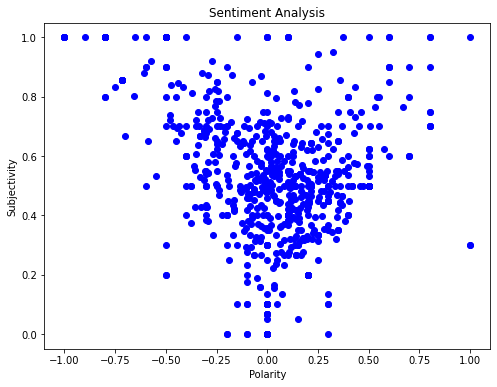

In [ ]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
df = df.drop(['Subjectivity'], axis=1)
df = df.drop(['Analysis'], axis=1)
x_data = df.drop(['Standing'], axis=1)
y_data = df['Standing'].values

In [ ]:
x_data.head()

,commentTextDisplay,Polarity
0,look side adverse reaction vaccine choose poison,0.000000
1,feel like want vaccinated choice run hospital ...,0.000000
2,body choice,0.000000
3,idea leave people alone let make decision best...,1.000000
4,respect freedom choice family member infected ...,0.114286


In [ ]:
#Prepare the train/test sets for SVM model
train_X, test_X, train_y, test_y = model_selection.train_test_split(df["commentTextDisplay"],df["Standing"], test_size=0.20, random_state=1000)
#train_X, test_X1, train_X2, test_X2, train_y, test_y = model_selection.train_test_split(df['commentTextDisplay'], df['Polarity'],df["Standing"], test_size=0.30, random_state=1000)
#train_X, test_X, train_y, test_y = model_selection.train_test_split(x_data, y_data, test_size=0.3)

tfidf_vect = TfidfVectorizer(max_features=2000)
train_X = tfidf_vect.fit_transform(train_X)
test_X = tfidf_vect.transform(test_X)


#x_train = hstack(train_commentTextDisplay, train_X)


In [ ]:
#SVM Model
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_X, train_y)
predictions_SVM = SVM.predict(test_X)
print("SVM Accuracy Score: ", accuracy_score(predictions_SVM, test_y)*100)

SVM Accuracy Score:  79.47368421052632
